In [2]:
import pandas as pd
import numpy as np

import bootcamp_utils

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
df = pd.read_csv('2017_0602_0626_qxn_tidy.csv')

In [4]:
#Set index using time
df.index = df['time']

In [5]:
df.head()

,group,mouse_id,sensor_type,time,activity(rev),hour,lightdark
time,,,,,,,
2017-06-02 11:36:00,DKO,623,0,2017-06-02 11:36:00,1,11,light
2017-06-02 11:37:00,DKO,623,0,2017-06-02 11:37:00,0,11,light
2017-06-02 11:38:00,DKO,623,0,2017-06-02 11:38:00,25,11,light
2017-06-02 11:39:00,DKO,623,0,2017-06-02 11:39:00,5,11,light
2017-06-02 11:40:00,DKO,623,0,2017-06-02 11:40:00,12,11,light


In [6]:
#slicing by genotype dko and dhet
dko = df.loc [df['group']=='DKO',:]
dhet = df.loc[df['group']=='DoubleHet', :]

#slicing by light/dark
dko_dark = dko.loc[dko['lightdark']=='dark', ['group','mouse_id','lightdark', 'activity(rev)']]
dko_light = dko.loc[dko['lightdark']=='light', ['group','mouse_id','lightdark', 'activity(rev)']]
dhet_dark = dhet.loc[dhet['lightdark']=='dark', ['group','mouse_id','lightdark', 'activity(rev)']]
dhet_light = dhet.loc[dhet['lightdark']=='light', ['group','mouse_id','lightdark', 'activity(rev)']]

In [7]:
dko_light.tail()

,group,mouse_id,lightdark,activity(rev)
time,,,,
2017-06-26 10:11:25,DKO,637,light,0
2017-06-26 10:12:25,DKO,637,light,0
2017-06-26 10:13:25,DKO,637,light,0
2017-06-26 10:14:25,DKO,637,light,0
2017-06-26 10:15:25,DKO,637,light,0


In [ ]:
# gb_dko_dark = dko_dark.groupby('mouse_id')
# gb_dko_light = dko_light.groupby('mouse_id')
# gb_dhet_dark = dhet_dark.groupby('mouse_id')
# gb_dhet_light = dhet_light.groupby('mouse_id')

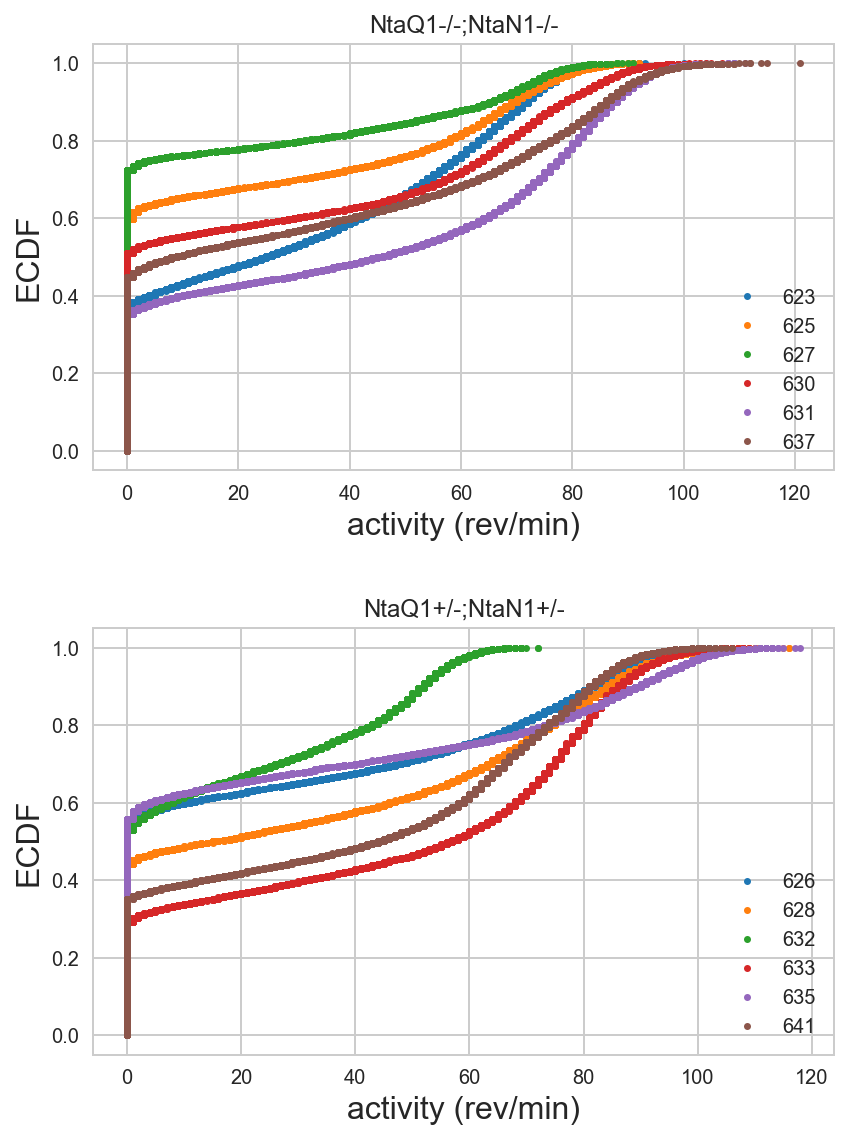

In [12]:
# Set up figure
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].set_xlabel('activity (rev/min)')
ax[1].set_xlabel('activity (rev/min)')
ax[0].set_ylabel('ECDF')
ax[1].set_ylabel('ECDF')
ax[0].set_title('NtaQ1-/-;NtaN1-/-')
ax[1].set_title('NtaQ1+/-;NtaN1+/-')

# Plot ECDFs
ax[0] = bootcamp_utils.ecdf_plot(dko_dark, 'activity(rev)', 
                                 hue='mouse_id', ax=ax[0])
ax[1] = bootcamp_utils.ecdf_plot(dhet_dark, 'activity(rev)', 
                                 hue='mouse_id', ax=ax[1])

# tight_layout makes sure axis labels, etc., to not overlap
fig.tight_layout(h_pad=3)

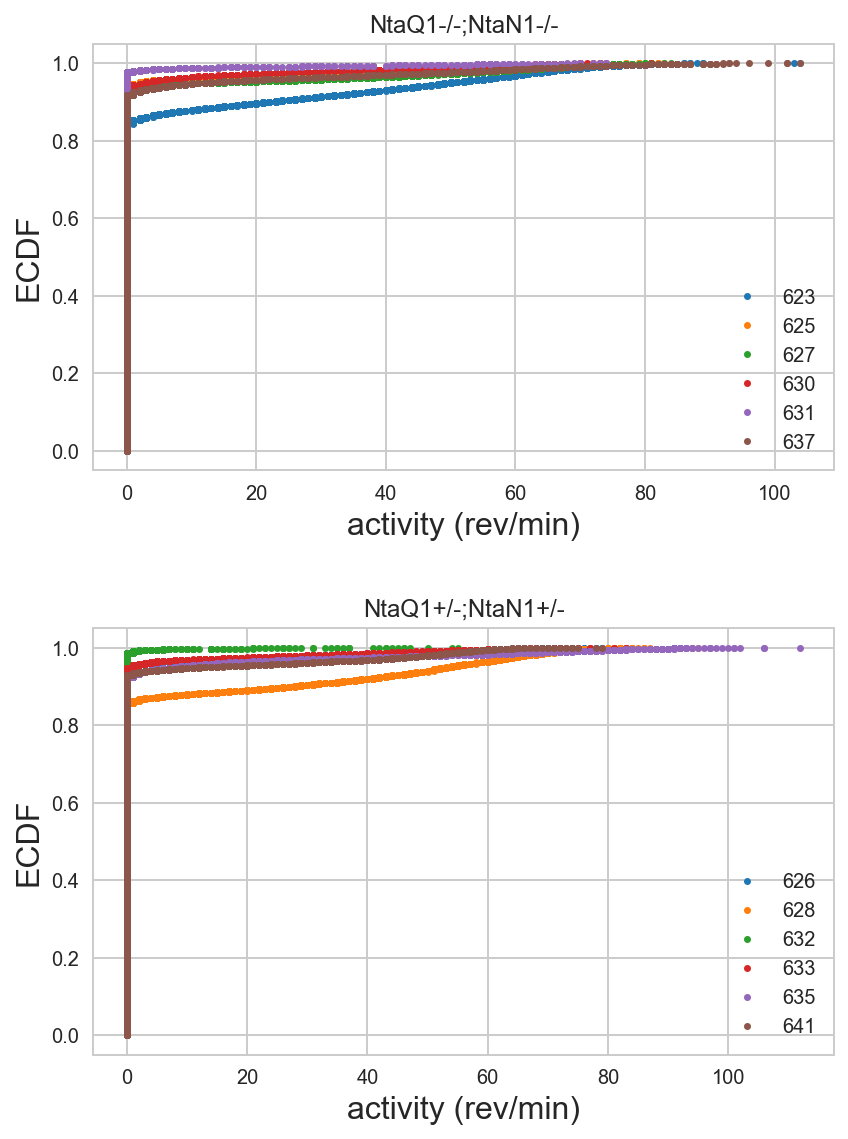

In [13]:
# Set up figure
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].set_xlabel('activity (rev/min)')
ax[1].set_xlabel('activity (rev/min)')
ax[0].set_ylabel('ECDF')
ax[1].set_ylabel('ECDF')
ax[0].set_title('NtaQ1-/-;NtaN1-/-')
ax[1].set_title('NtaQ1+/-;NtaN1+/-')

# Plot ECDFs
ax[0] = bootcamp_utils.ecdf_plot(dko_light, 'activity(rev)', 
                                 hue='mouse_id', ax=ax[0])
ax[1] = bootcamp_utils.ecdf_plot(dhet_light, 'activity(rev)', 
                                 hue='mouse_id', ax=ax[1])

# tight_layout makes sure axis labels, etc., to not overlap
fig.tight_layout(h_pad=3)

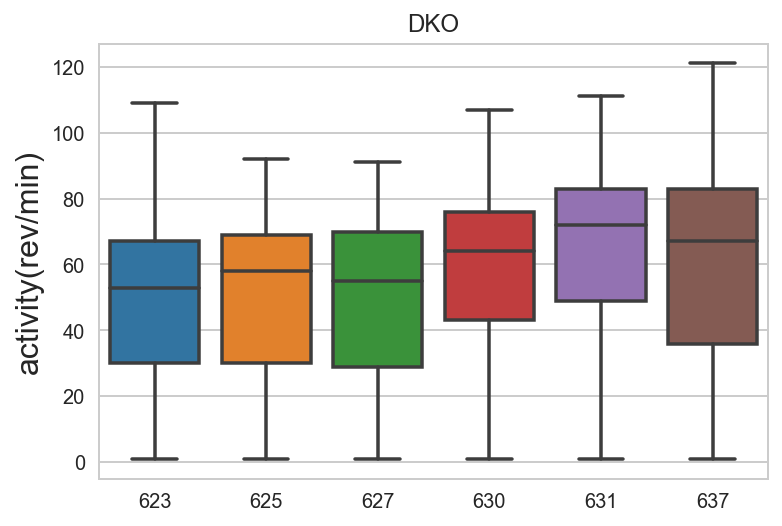

In [16]:
dko_dark_active = dko.loc[(dko['lightdark']=='dark')&(dko['activity(rev)'] != 0), ]

ax = sns.boxplot(data=dko_dark_active, x='mouse_id', y='activity(rev)')
ax.set_xlabel('')
ax.set_ylabel('activity(rev/min)')
ax.set_title('DKO')

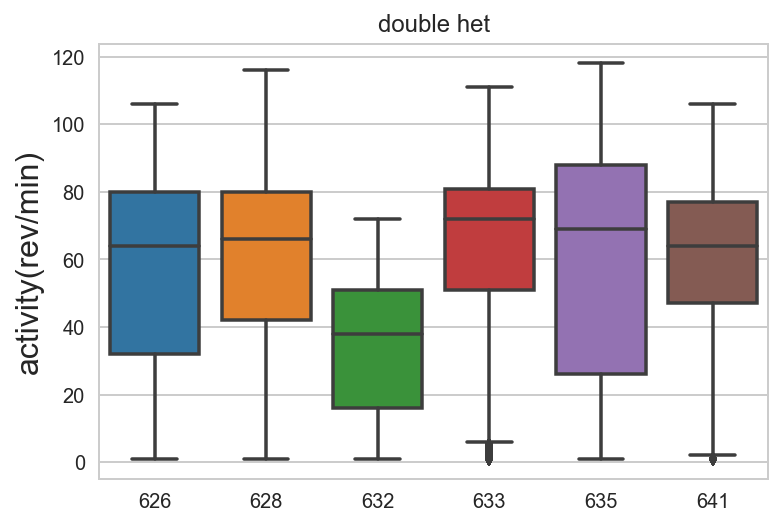

In [18]:
dhet_dark_active = dhet.loc[(dhet['lightdark']=='dark')&(dhet['activity(rev)'] != 0), ]

ax = sns.boxplot(data=dhet_dark_active, x='mouse_id', y='activity(rev)')
ax.set_xlabel('')
ax.set_ylabel('activity(rev/min)')
ax.set_title('double het')